# Analise dos dados utilizando Bag of Words

### Dependencias gerais

In [1]:
# Bibliotecas de Sistema e Gerenciamento de Arquivos
import os  # Manipulação de caminhos de arquivos
import math  # Funções matemáticas (ex.: logaritmos, arredondamentos)

# Processamento de Linguagem Natural
import nltk  # Tokenização, stopwords, manipulação de texto
import string  # Manipulação de strings e pontuações
from nltk.tokenize import word_tokenize  # Tokenização de texto
from nltk.corpus import stopwords  # Stopwords em múltiplos idiomas


# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
# Definir a lista de stopwords para o idioma desejado (por exemplo, 'portuguese' ou 'english')
stop_words = set(stopwords.words('english'))

# Manipulação de Dados
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Vetorização de Texto e Similaridade
from sklearn.feature_extraction.text import CountVectorizer # Vetorização com Bag of Words (BoW)
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorização com TF-IDF
from sklearn.metrics.pairwise import cosine_similarity  # Cálculo de similaridade cosseno

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luizk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luizk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Carregar os dados do .CSV

In [14]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
documentos = []
textos_brutos = []
textos_processados = []

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        documentos.append(row[0])
        textos_brutos.append(row[1])
        textos_processados.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", ""))

# Etapa 3: Criar o DataFrame
df = pd.DataFrame({
    'documento': documentos,
    'texto_bruto': textos_brutos,
    'texto_processado': textos_processados,
})

# Visualizar o DataFrame
df

,documento,texto_bruto,texto_processado
0,acid-splash,\nAcid Splash\n\n\n\n\n\n\n\nSource: Player's ...,acid splash source players handbook conjuratio...
1,blade-ward,\nBlade Ward\n\n\n\n\n\n\n\nSource: Player's H...,blade ward source players handbook abjuration ...
2,booming-blade,\nBooming Blade\n\n\n\n\n\n\n\nSource: Tasha's...,booming blade source tashas cauldron everythin...
3,chill-touch,\nChill Touch\n\n\n\n\n\n\n\nSource: Player's ...,chill touch source players handbook necromancy...
4,control-flames,\nControl Flames\n\n\n\n\n\n\n\nSource: Xanath...,control flames source xanathars guide everythi...
...,...,...,...
575,time-stop,\nTime Stop\n\n\n\n\n\n\n\nSource: Player's Ha...,time stop source players handbook 9thlevel tra...
576,true-polymorph,\nTrue Polymorph\n\n\n\n\n\n\n\nSource: Player...,true polymorph source players handbook 9thleve...
577,true-resurrection,\nTrue Resurrection\n\n\n\n\n\n\n\nSource: Pla...,true resurrection source players handbook 9thl...
578,weird,\nWeird\n\n\n\n\n\n\n\nSource: Player's Handbo...,weird source players handbook 9thlevel illusio...


## Vetorização e Análises em Bag of Words

Deste ponto em diante, vamos refazer o dataframe com apenas 50 documentos aleatórios, para tornar possível a visualização dos dados de maneira gráfica, uma vez que utilizando todos os quase 600 documentos, isso fica bem complicado.

In [17]:
import random

indices_aleatorios = random.sample(range(len(documentos)), 50)

documentos_resumidos = [documentos[i] for i in indices_aleatorios]
textos_brutos_resumidos = [textos_brutos[i] for i in indices_aleatorios]
textos_processados_resumidos = [textos_processados[i] for i in indices_aleatorios]


# Criar um data frame resumido
df = pd.DataFrame({
    'documento': documentos_resumidos,
    'texto_bruto': textos_brutos_resumidos,
    'texto_processado': textos_processados_resumidos,
})

df

,documento,texto_bruto,texto_processado
0,evards-black-tentacles,\nEvard's Black Tentacles\n\n\n\n\n\n\n\nSourc...,evards black tentacles source players handbook...
1,color-spray,\nColor Spray\n\n\n\n\n\n\n\nSource: Player's ...,color spray source players handbook 1stlevel i...
2,widogast-s-transmogrification-hb,\nWidogast's Transmogrification (HB)\n\n\n\n\n...,widogasts transmogrification hb source critica...
3,dark-star,\nDark Star\n\n\n\n\n\n\n\nSource: Explorer's ...,dark star source explorers guide wildemount 8t...
4,ensnaring-strike,\nEnsnaring Strike\n\n\n\n\n\n\n\nSource: Play...,ensnaring strike source players handbook 1stle...
5,arcane-gate,\nArcane Gate\n\n\n\n\n\n\n\nSource: Player's ...,arcane gate source players handbook 6thlevel c...
6,power-word-stun,\nPower Word: Stun\n\n\n\n\n\n\n\nSource: Play...,power word stun source players handbook 8thlev...
7,tashas-mind-whip,\nTasha's Mind Whip\n\n\n\n\n\n\n\nSource: Tas...,tashas mind whip source tashas cauldron everyt...
8,scatter,\nScatter\n\n\n\n\n\n\n\nSource: Xanathar's Gu...,scatter source xanathars guide everything 6thl...
9,spike-growth,\nSpike Growth\n\n\n\n\n\n\n\nSource: Player's...,spike growth source players handbook 2ndlevel ...


Usaremos o `CountVectorizer` da biblioteca `scikit-learn` para transformar os textos em vetores de contagem de palavras (Bag of Words).


In [19]:
# Instanciar o CountVectorizer
vectorizer = CountVectorizer()

# Aplicar a vetorização ao texto processado
X_bag_of_words = vectorizer.fit_transform(df['texto_processado'])

# Converter a matriz esparsa resultante para um DataFrame
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Definir a coluna 'documento' como índice do DataFrame
df_bag_of_words.index = df['documento']

df_bag_of_words

,10,100,10foot,10footradius,10foottall,11,11th,12,120,12d12,...,write,writhing,writing,written,wrote,wrought,xanathars,year,yellow,zephyr
documento,,,,,,,,,,,,,,,,,,,,,
evards-black-tentacles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
color-spray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
widogast-s-transmogrification-hb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
dark-star,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ensnaring-strike,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
arcane-gate,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
power-word-stun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tashas-mind-whip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scatter,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### Análise da quantidade de tokens por documento

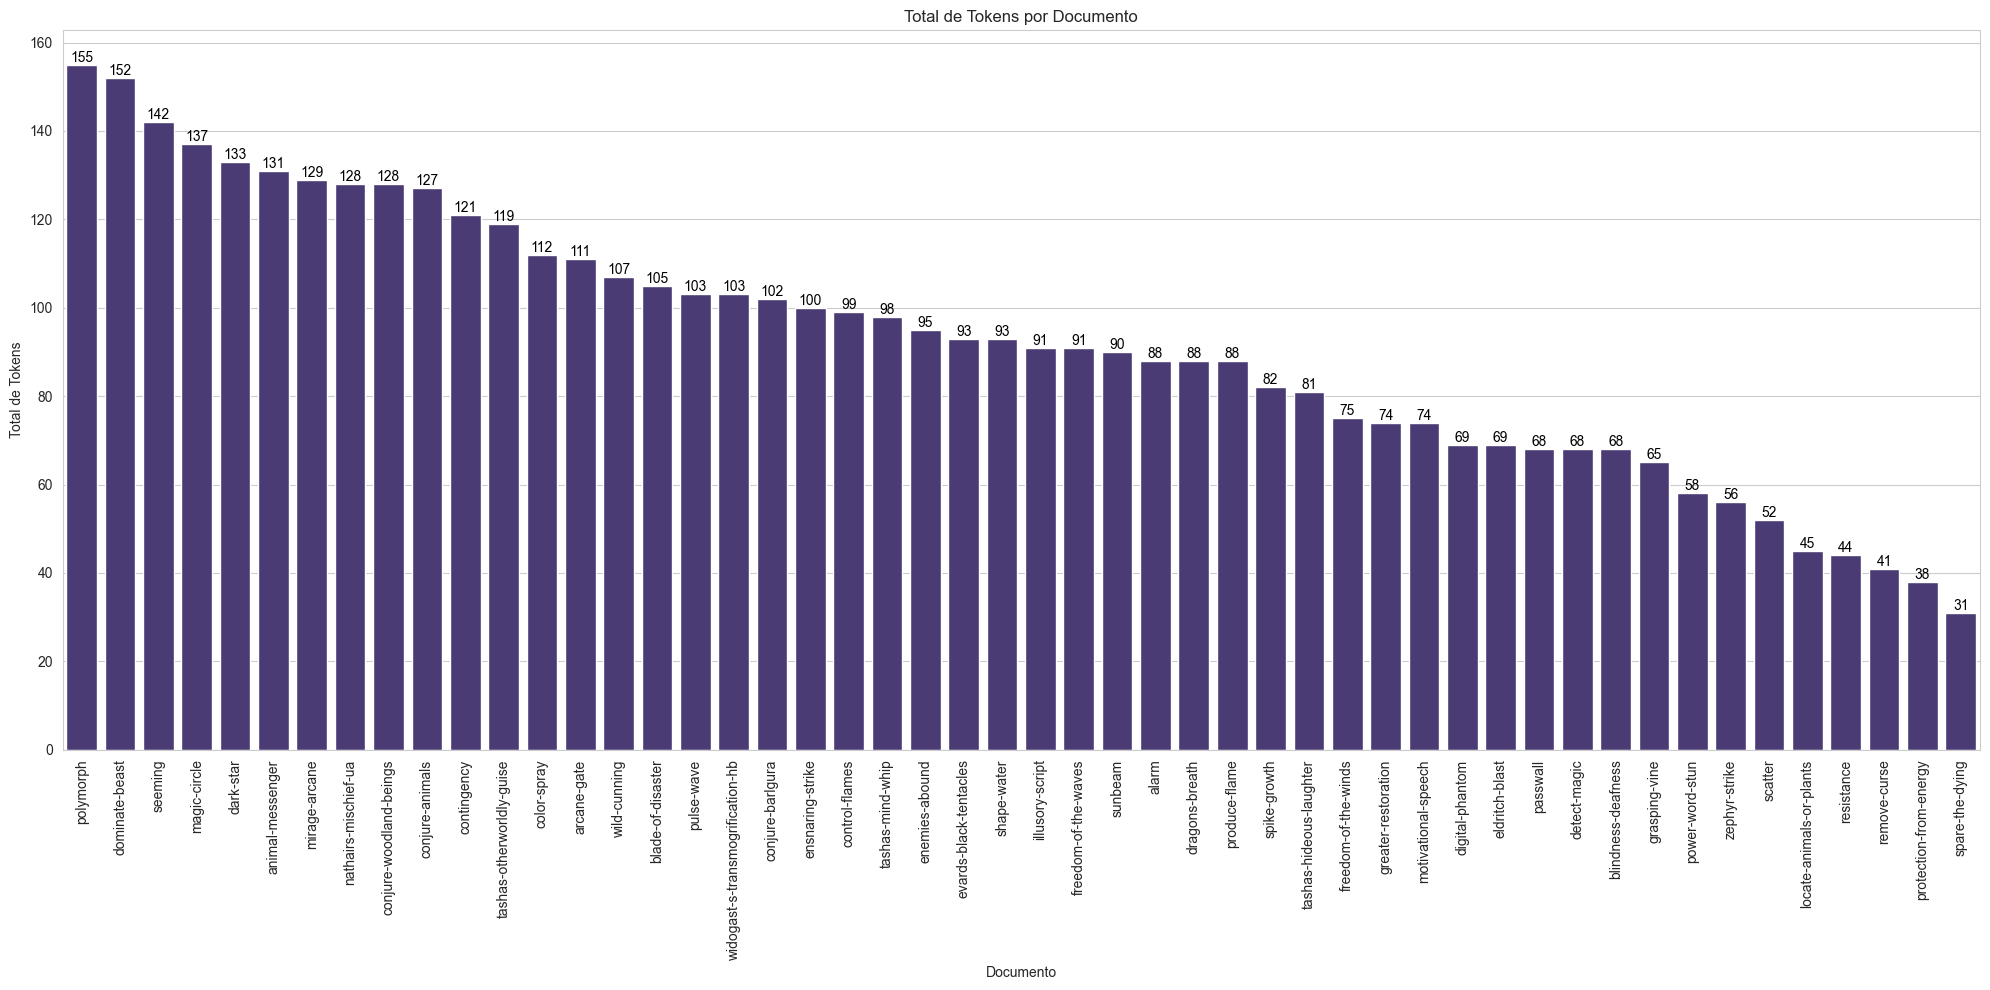

In [21]:
# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")  # Estilo de grade branca
sns.set_palette("viridis")  # Paleta de cores 'viridis'

# Passo 1: Calcular o total de tokens em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Criar um DataFrame para facilitar a plotagem
df_total_tokens = total_tokens.reset_index()
df_total_tokens.columns = ['Documento', 'Total de Tokens']

# Ordenar os documentos pela frequência de tokens em ordem decrescente
df_total_tokens = df_total_tokens.sort_values(by='Total de Tokens', ascending=False)

# Visualização do total de tokens por documento
plt.figure(figsize=(20,10))
barplot = sns.barplot(x='Documento', y='Total de Tokens', data=df_total_tokens)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_total_tokens['Total de Tokens']):
    barplot.text(index, row, f'{int(row)}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Total de Tokens por Documento')
plt.xlabel('Documento')
plt.ylabel('Total de Tokens')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Análise de riqueza do vocabulário

Este cálculo é a chave para medir a riqueza do vocabulário de cada documento. A riqueza do vocabulário é definida como a proporção entre o número de palavras únicas e o número total de palavras (tokens). Valores próximos de 1 indicam que quase todas as palavras no documento são únicas (ou seja, o vocabulário é mais variado), enquanto valores mais próximos de 0 indicam que há muita repetição de palavras.

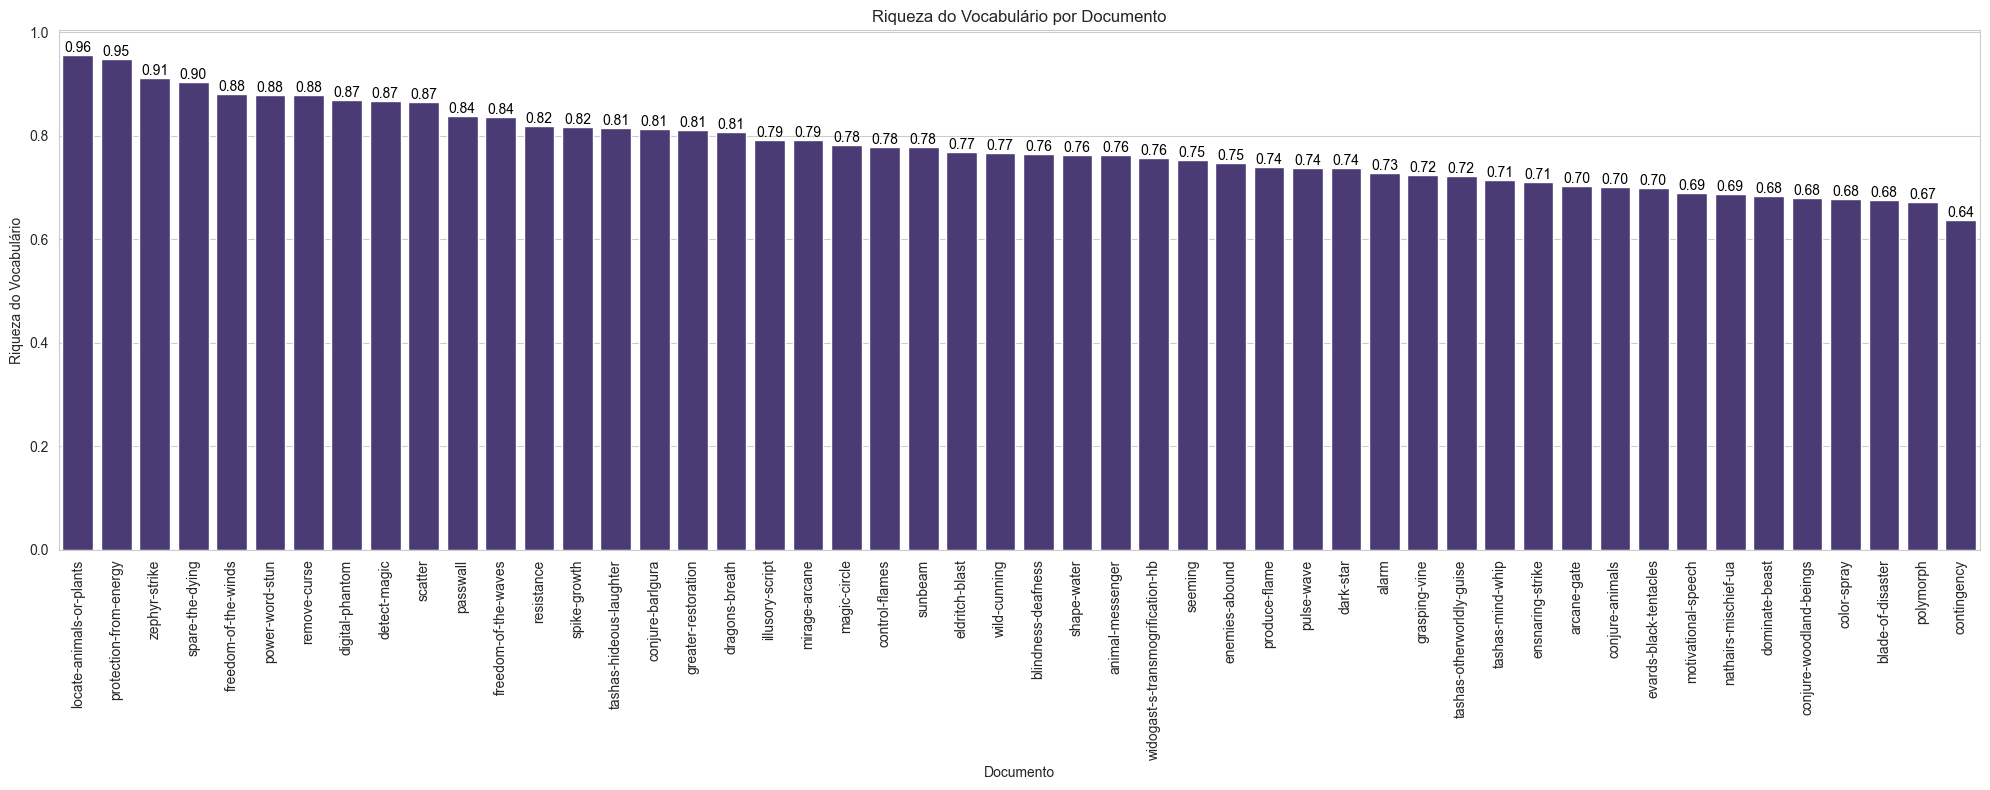

In [24]:
# Passo 1: Calcular o total de tokens (palavras) em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Passo 2: Calcular o número de palavras únicas (não repetidas) em cada documento
unique_tokens = df_bag_of_words[df_bag_of_words > 0].count(axis=1)

# Passo 3: Calcular a riqueza do vocabulário (proporção de palavras únicas / total de palavras)
vocabulary_richness = unique_tokens / total_tokens

# Criar um DataFrame para facilitar a plotagem
df_richness = vocabulary_richness.reset_index()
df_richness.columns = ['Documento', 'Riqueza do Vocabulário']

# Ordenar os documentos pela riqueza do vocabulário em ordem decrescente
df_richness = df_richness.sort_values(by='Riqueza do Vocabulário', ascending=False)

# Visualizar a riqueza do vocabulário por documento
plt.figure(figsize=(20,8))
barplot = sns.barplot(x='Documento', y='Riqueza do Vocabulário', data=df_richness)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_richness['Riqueza do Vocabulário']):
    barplot.text(index, row, f'{row:.2f}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Riqueza do Vocabulário por Documento')
plt.xlabel('Documento')
plt.ylabel('Riqueza do Vocabulário')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Top Tokens por documento

Segue a análise dos tokens mais frequentes em cada documento.

Primeiramente, obtemos os `n` tokens mais frequentes de cada doc utilizando `nlargest`.

In [27]:
def get_top_tokens(df, top_n=10):

    top_tokens_list = [
        {'documento': documento, 'token': token, 'frequencia': count}
        for documento, row in df.iterrows()
        for token, count in row.nlargest(top_n).items()  # Obtém os N tokens mais frequentes
        if count > 0  # Garante que os tokens tenham contagem maior que zero
    ]

    # Converter a lista em DataFrame
    df_top = pd.DataFrame(top_tokens_list)
    return df_top

df_top_tokens = get_top_tokens(df_bag_of_words, top_n=10)
print(df_top_tokens)

                  documento       token  frequencia
0    evards-black-tentacles   tentacles           6
1    evards-black-tentacles    creature           4
2    evards-black-tentacles        turn           4
3    evards-black-tentacles        area           3
4    evards-black-tentacles  restrained           3
..                      ...         ...         ...
495        conjure-barlgura       moves           2
496        conjure-barlgura      random           2
497        conjure-barlgura       range           2
498        conjure-barlgura         see           2
499        conjure-barlgura       space           2

[500 rows x 3 columns]


Em seguida, podemos visualizar essa frequência visualmente.

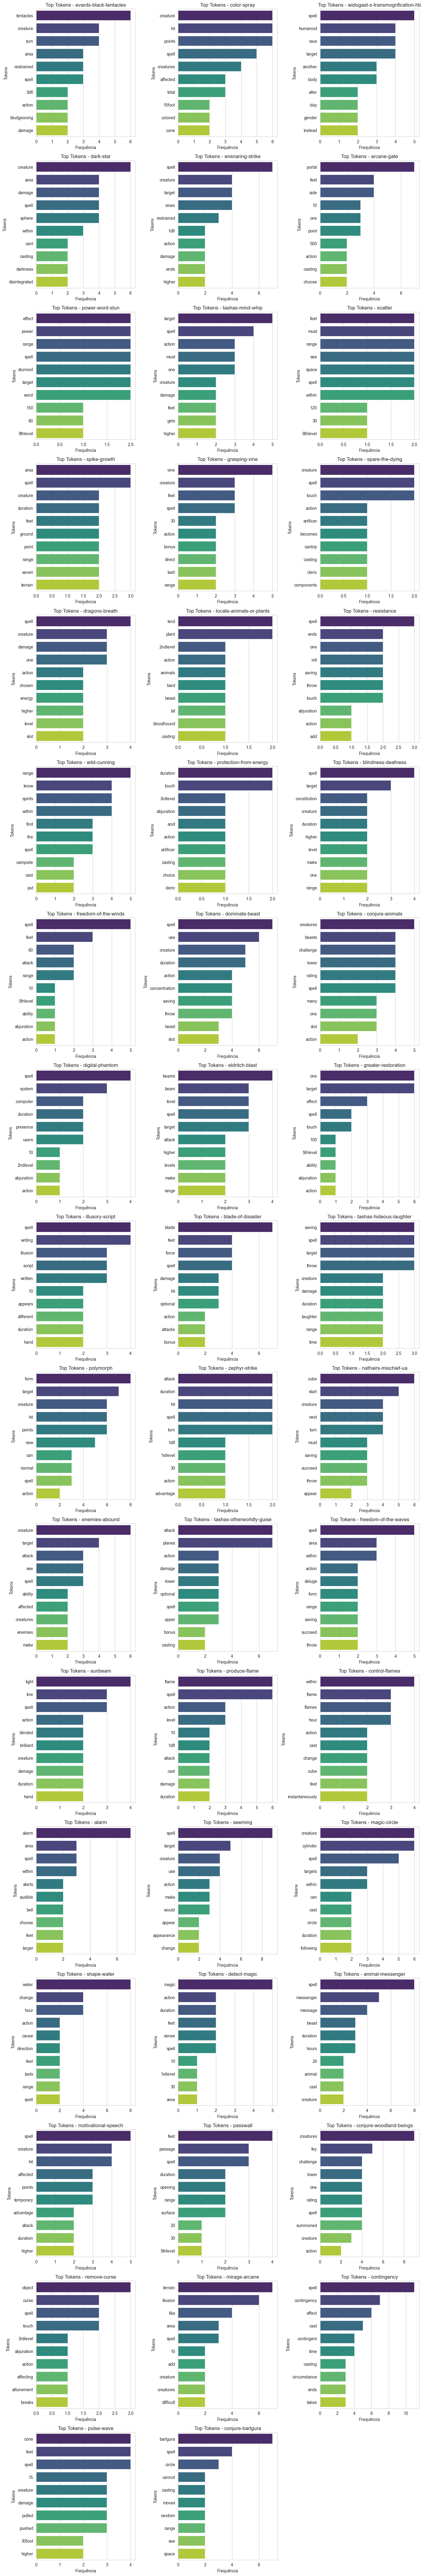

In [28]:
def plot_top_tokens_small_multiples(df_top_tokens, cols=3):
    # Obter a lista única de documentos
    documentos = df_top_tokens['documento'].unique()
    num_documentos = len(documentos)

    # Determinar o número de linhas com base no número de documentos e colunas
    rows = math.ceil(num_documentos / cols)

    # Definir o tamanho da figura com base no número de documentos e colunas
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharex=False, sharey=False)

    # Se houver apenas uma linha ou coluna, garantir que axes seja uma matriz bidimensional
    axes = axes.flatten() if num_documentos > 1 else [axes]

    # Loop através de cada documento e criar um gráfico individual
    for i, documento in enumerate(documentos):
        ax = axes[i]
        df_subset = df_top_tokens[df_top_tokens['documento'] == documento]

        # Criar o gráfico de barras para os top tokens
        sns.barplot(x='frequencia', y='token', data=df_subset, ax=ax, palette='viridis', hue='token', dodge=False)
        ax.set_title(f'Top Tokens - {documento}')
        ax.set_xlabel('Frequência')
        ax.set_ylabel('Tokens')

        # Verifica se a legenda foi criada antes de tentar removê-la
        if ax.legend_ is not None:
            ax.legend_.remove()

    # Remover eixos vazios, caso o número de documentos não preencha todas as posições
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Uso da função de plotagem com 2 colunas
plot_top_tokens_small_multiples(df_top_tokens, cols=3)